**GEMSTONE IDENTIFICATION USING CNN(TRANSFER LEARNING)**
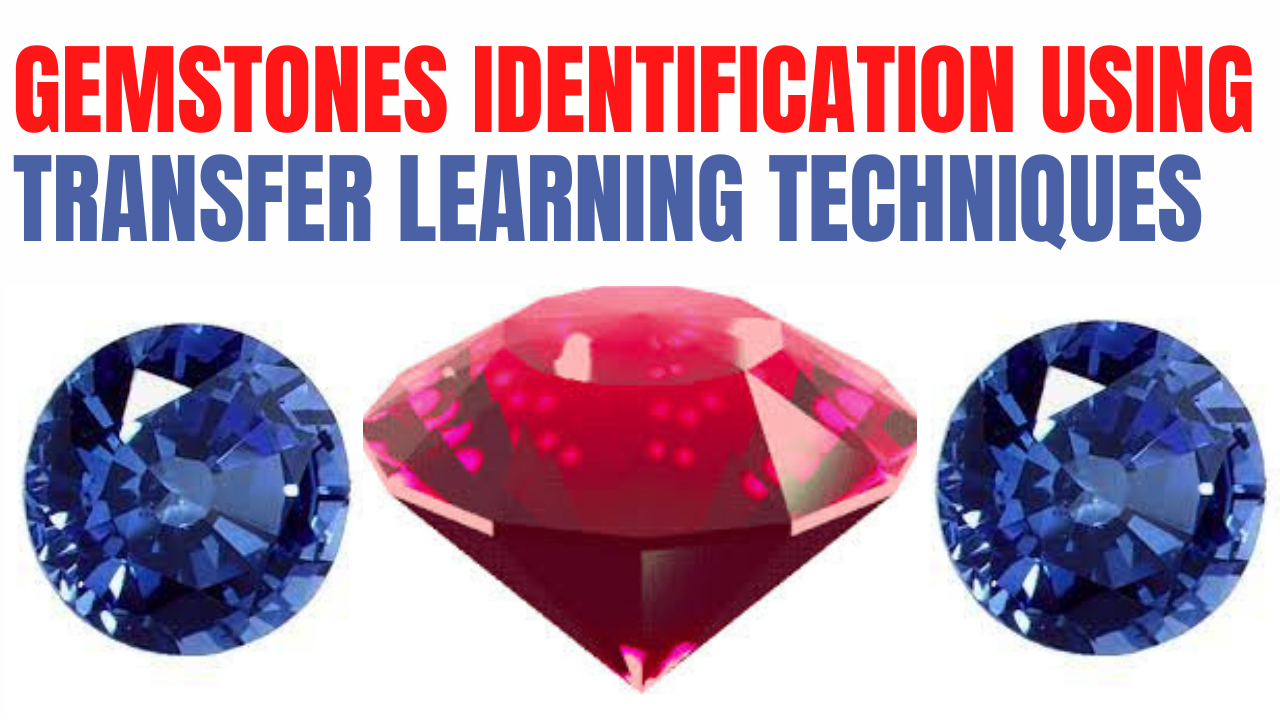

Welcome to this project guys!
Today I'm going to be using CNN(transfer learning) to identify seven diferents gemstones.The gemstones considered include:Amathyst, Aquamarine,Emarald, Opal, Ruby, Saphire and Sunstone.

**What are Gemstones?**

Gemstones are the naturally ocuring beauties , according to wikipedia "A gemstone (also called a gem, fine gem, jewel, precious stone, or semi-precious stone) is a piece of mineral crystal which, in cut and polished form, is used to make jewelry or other adornments."
There are about 200 naturally occuring gemstones in the world, but in this project am going to consider only seven for the sake of time and computational resources.

**Models Used for the project Include the following**

*   VGG16
*   VGG19
*   Inceptionv3


**Model Performance Summary**

* VGG16 training accuracy 73% and validation accuracy 72%
* VGG19 training accuracy 74% and validation accuracy 67%
* Inceptionv3 training accuracy 55% and validation accuracy 45%






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install the gradio app

In [ ]:
!pip install gradio

Import the needed python libraries

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import gradio as gr
import PIL

Load the data from the folder into a variable called gems_folder.

In [ ]:
gems_folder = glob('/content/drive/MyDrive/Gemstone IDENTIFICATION/train/*')

lets check the number of gemstones we need to classify or the number of labels.

In [ ]:
print('number of gems we need to classify is {}'.format(len(gems_folder)))

number of gems we need to classify is 7


Let's visualize an amathyst.

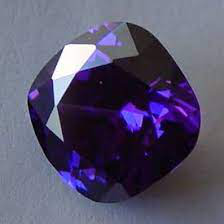

In [ ]:
amethyst = '/content/drive/MyDrive/Gemstone IDENTIFICATION/train/amethyst/amathyst_free.jpg'
PIL.Image.open(str(amethyst))

This looks beautiful right!

**Data Augmentation**

We need to augment our data so that our model will be more robust.

To achieve this we use the keras ImageDataGenerator api.
We shear our images using shear range of 0.25, zoom it using zoom range of 0.2, flip it vertically and horizontally.

For the training data

In [ ]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.25,
                                   zoom_range = 0.2,
                                   width_shift_range=0.2,
                                   vertical_flip=True,
                                   horizontal_flip = True)

In [ ]:
train = train.flow_from_directory('/content/drive/MyDrive/Gemstone IDENTIFICATION/train/',
                                                 target_size = (224,224),
                                                 batch_size =20 ,
                                                 class_mode = 'categorical')

Found 1796 images belonging to 7 classes.


The classes for our dataset

In [ ]:
gem_labels = [gem for gem in train.class_indices]
gem_labels

['amethyst', 'aquamarine', 'emarald', 'opal', 'ruby', 'saphire', 'sunstone']

Let's scale the validation data

In [ ]:
val = ImageDataGenerator(rescale = 1./255)

In [ ]:
val_data = val.flow_from_directory('/content/drive/MyDrive/Gemstone IDENTIFICATION/validation/',
                                                 target_size = (224, 224),
                                                 batch_size = 20,
                                                 class_mode = 'categorical')

Found 328 images belonging to 7 classes.


Now we are done with data augmentation, let's start building the models.

## **Model Building**

**VGG16 TRANSFER LEARNING TECHNIQUE**

**Loading VGG16**

This model was developed by the visual graphics group during the imagenet competition.
We are going to make use of it to extract the features and feed it into a new model for classification. Since we don't need the top we set it to false and specify the shape of the image to 224 by 224 and the channels to 3(this represent RGB). The layers are not to be retrain so we set trainable to false.

In [ ]:
vgg16_model = VGG16(input_shape=[224,224,3], weights='imagenet', include_top=False)
for layer in vgg16_model.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


**Flattened and Add Dense Layer**

Since we have different number of labels or output we need to flattened the last layer so we can add our own dense layer.

We use softmax activation function since we are dealing with multiclass classification problem, the 7 represent the number of output we are expecting.

In [ ]:
output = Dense(7, activation='softmax')(Flatten()(vgg16_model.output))

**New Model**

Let's initialize a model object and specify the inputs and outputs(predictions).

In [ ]:
model = Model(inputs=vgg16_model.input, outputs=output)

After initializing the model it's good to have a look  at the model's summary.

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Now, let's specify the optimization and cost functions we want our model to use.

In [ ]:
model.compile(optimizer='adam',   
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

The model is now ready,let's fit it to the data

In [ ]:
history = model.fit(
  train,
  validation_data=val_data,
  epochs=20,
  steps_per_epoch=len(train)//20,
  validation_steps=len(val_data)
)

Epoch 1/20
4/4 [==============================] - 173s 52s/step - loss: 3.1875 - accuracy: 0.2895 - val_loss: 2.3827 - val_accuracy: 0.2622
Epoch 2/20
4/4 [==============================] - 158s 48s/step - loss: 2.0551 - accuracy: 0.2105 - val_loss: 1.7829 - val_accuracy: 0.3506
Epoch 3/20
4/4 [==============================] - 157s 48s/step - loss: 1.5509 - accuracy: 0.4125 - val_loss: 2.8050 - val_accuracy: 0.3079
Epoch 4/20
4/4 [==============================] - 158s 48s/step - loss: 2.7437 - accuracy: 0.4000 - val_loss: 1.9619 - val_accuracy: 0.4878
Epoch 5/20
4/4 [==============================] - 158s 48s/step - loss: 1.7259 - accuracy: 0.4000 - val_loss: 1.4068 - val_accuracy: 0.5244
Epoch 6/20
4/4 [==============================] - 161s 49s/step - loss: 1.4003 - accuracy: 0.5375 - val_loss: 1.7002 - val_accuracy: 0.4421
Epoch 7/20
4/4 [==============================] - 177s 55s/step - loss: 1.2504 - accuracy: 0.5875 - val_loss: 1.2146 - val_accuracy: 0.5976
Epoch 8/20
4/4 [====

**Using vgg19 Tranfer learning techniques**


VGG19 was developed by the visual graphics group and is similar to the vgg16.

The setup of vgg16 will be same.

we are going to set the image height, width,channel to 224, 224  and 3 respectively.
We won't retrain the layers.

In [ ]:
vgg19_model = VGG19(input_shape=[224,224,3], weights='imagenet', include_top=False)
for layer in vgg19_model.layers:
    layer.trainable = False

80142336/80134624 [==============================] - 1s 0us/step


Let's initialize and train the model on the data.

In [ ]:
output = Dense(7, activation='softmax')(Flatten()(vgg19_model.output))
model = Model(inputs=vgg19_model.input, outputs=output)
model.compile(optimizer='adam',   
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

history = model.fit(
  train,
  validation_data=val_data,
  epochs=20,
  steps_per_epoch=len(train)//20,
  validation_steps=3
)

Epoch 1/20
4/4 [==============================] - 94s 26s/step - loss: 3.3596 - accuracy: 0.2375 - val_loss: 2.6416 - val_accuracy: 0.3167
Epoch 2/20
4/4 [==============================] - 92s 26s/step - loss: 2.4624 - accuracy: 0.2500 - val_loss: 2.3045 - val_accuracy: 0.1833
Epoch 3/20
4/4 [==============================] - 88s 26s/step - loss: 2.0425 - accuracy: 0.3026 - val_loss: 2.0539 - val_accuracy: 0.3000
Epoch 4/20
4/4 [==============================] - 89s 25s/step - loss: 1.8947 - accuracy: 0.3684 - val_loss: 2.4825 - val_accuracy: 0.3667
Epoch 5/20
4/4 [==============================] - 91s 25s/step - loss: 1.8669 - accuracy: 0.5125 - val_loss: 1.4313 - val_accuracy: 0.5000
Epoch 6/20
4/4 [==============================] - 92s 26s/step - loss: 1.9242 - accuracy: 0.3750 - val_loss: 1.7086 - val_accuracy: 0.5000
Epoch 7/20
4/4 [==============================] - 91s 26s/step - loss: 1.3590 - accuracy: 0.5625 - val_loss: 1.6182 - val_accuracy: 0.4667
Epoch 8/20
4/4 [===========

**Using InceptionV3 Transfer Learning Techniques**

The inceptionv3 was developed by google brains and it expect the color images to have shape of 299 by 299, but we will make use of 224 by 224

In [ ]:
InceptionV3_model = InceptionV3(input_shape=[224,224,3], weights='imagenet', include_top=False)
for layer in InceptionV3_model.layers:
    layer.trainable = False

In [ ]:
output = Dense(7, activation='softmax')(Flatten()(InceptionV3_model.output))
model = Model(inputs=InceptionV3_model.input, outputs=output)

model.compile(optimizer='adam',   
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

history = model.fit(
  train,
  validation_data=val_data,
  epochs=20,
  steps_per_epoch=len(train)//20,
  validation_steps=3
)

Epoch 1/20
4/4 [==============================] - 23s 5s/step - loss: 11.1734 - accuracy: 0.1500 - val_loss: 11.5086 - val_accuracy: 0.2167
Epoch 2/20
4/4 [==============================] - 17s 5s/step - loss: 16.2390 - accuracy: 0.1500 - val_loss: 12.7311 - val_accuracy: 0.3333
Epoch 3/20
4/4 [==============================] - 17s 5s/step - loss: 17.7188 - accuracy: 0.2375 - val_loss: 15.7446 - val_accuracy: 0.3000
Epoch 4/20
4/4 [==============================] - 17s 5s/step - loss: 11.4917 - accuracy: 0.2375 - val_loss: 5.5726 - val_accuracy: 0.4000
Epoch 5/20
4/4 [==============================] - 17s 5s/step - loss: 6.4531 - accuracy: 0.4250 - val_loss: 8.7435 - val_accuracy: 0.3167
Epoch 6/20
4/4 [==============================] - 17s 5s/step - loss: 8.7824 - accuracy: 0.4000 - val_loss: 7.0575 - val_accuracy: 0.4333
Epoch 7/20
4/4 [==============================] - 17s 5s/step - loss: 6.5704 - accuracy: 0.4250 - val_loss: 5.0593 - val_accuracy: 0.4500
Epoch 8/20
4/4 [===========

The VGG16 seems to have the best performance, so we will make use of it for the gradio user interface.

But first we need to create the classification function before passing it into the gradio app.

---



In [ ]:
def gem_indentify(image):
  img=image.reshape(-1,224,224,3)
  pred=model.predict(img)[0]
  return {gem_labels[i]: float(pred[i]) for i in range(7)}

In [ ]:
image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label(num_top_classes=7)

In [ ]:
gr.Interface(fn=gem_indentify, inputs=image, outputs=label,interpretation='default').launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://22321.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7863/',
 'https://22321.gradio.app')